***The goal of Stage II is to develop the data for modeling and comparative analysis. Here you will be comparing how US is doing with other countries in COVID cases and deaths. And you will be also analysing county based information for different states in the US.

**All the tasks are performed only on COVID data in the second half year of 2022, that is, from 6/1/2022 to 12/31/2022.

Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

Identify 3 counties within a state of your choice with high cases and death rates.

Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [96]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.


In [97]:
df = pd.read_csv("/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/Submit/CovidData.csv")

start_date = '2022-06-01'
end_date = '2022-12-31'

#list of columns to select
cols_x = [col for col in df.columns if col.endswith('_cases') and col[:10] >= start_date and col[:10] <= end_date]
cols_y = [col for col in df.columns if col.endswith('_deaths') and col[:10] >= start_date and col[:10] <= end_date]
cols_to_select = ['County Name', 'population', 'countyFIPS', 'State', 'StateFIPS'] + cols_x + cols_y

df = df[cols_to_select]
df.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/Submit/CovidData_2022.csv', index=False)

df

,County Name,population,countyFIPS,State,StateFIPS,2022-06-01_cases,2022-06-02_cases,2022-06-03_cases,2022-06-04_cases,2022-06-05_cases,...,2022-12-22_deaths,2022-12-23_deaths,2022-12-24_deaths,2022-12-25_deaths,2022-12-26_deaths,2022-12-27_deaths,2022-12-28_deaths,2022-12-29_deaths,2022-12-30_deaths,2022-12-31_deaths
0,Autauga County,55869,1001,AL,1,15969,15978,15978,15978,15978,...,230,230,230,230,230,230,230,230,230,230
1,Baldwin County,223234,1003,AL,1,56580,56648,56648,56648,56648,...,719,719,719,719,719,719,719,719,719,719
2,Barbour County,24686,1005,AL,1,5710,5714,5714,5714,5714,...,103,103,103,103,103,103,103,103,103,103
3,Bibb County,22394,1007,AL,1,6508,6512,6512,6512,6512,...,108,108,108,108,108,108,108,108,108,108
4,Blount County,57826,1009,AL,1,15077,15084,15084,15084,15084,...,260,260,260,260,260,260,260,260,260,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,Sweetwater County,42343,56037,WY,56,11178,11178,11178,11178,11178,...,136,136,136,136,136,136,136,136,136,136
3081,Teton County,23464,56039,WY,56,10229,10229,10229,10229,10229,...,16,16,16,16,16,16,16,16,16,16
3082,Uinta County,20226,56041,WY,56,5681,5681,5681,5681,5681,...,43,43,43,43,43,43,43,43,43,43
3083,Washakie County,7805,56043,WY,56,2369,2369,2369,2369,2369,...,47,47,47,47,47,47,47,47,47,47


In [98]:
melted_df = pd.melt(df, id_vars=['County Name', 'population', 'countyFIPS', 'State', 'StateFIPS'], 
                    var_name='Date', value_name='CasesNDeaths')

# splitting cases and deaths to seperate cols
melted_df[['Date', 'Type']] = melted_df['Date'].str.split('_', expand=True)
melted_df = melted_df.pivot_table(index=['Date', 'County Name', 'population', 'countyFIPS', 'State', 'StateFIPS'], columns='Type', values='CasesNDeaths').reset_index()

melted_df.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/Submit/CovidData_2022_melted.csv', index=False)

melted_df

Type,Date,County Name,population,countyFIPS,State,StateFIPS,cases,deaths
0,2022-06-01,Abbeville County,24527,45001,SC,45,6655,69
1,2022-06-01,Acadia Parish,62045,22001,LA,22,15986,294
2,2022-06-01,Accomack County,32316,51001,VA,51,7167,107
3,2022-06-01,Ada County,481587,16001,ID,16,137230,1023
4,2022-06-01,Adair County,7152,19001,IA,19,1591,50
...,...,...,...,...,...,...,...,...
660185,2022-12-31,Yuma County,10019,8125,CO,8,2302,27
660186,2022-12-31,Yuma County,213787,4027,AZ,4,69894,1167
660187,2022-12-31,Zapata County,14179,48505,TX,48,4321,56
660188,2022-12-31,Zavala County,11840,48507,TX,48,4425,70


In [99]:
State = 'AR'
melted_df_AR = melted_df[melted_df['State'] == 'AR']

melted_df_AR = melted_df_AR.groupby(melted_df_AR['Date']).sum().reset_index()

melted_df_AR['new cases'] = melted_df_AR['cases'].diff()
melted_df_AR['new deaths'] = melted_df_AR['deaths'].diff()

melted_df_AR.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/Submit/CovidData_2022_melted_AR.csv', index=False)

melted_df_AR

Type,Date,population,countyFIPS,StateFIPS,cases,deaths,new cases,new deaths
0,2022-06-01,3017804,380625,375,816616,11488,NaN,NaN
1,2022-06-02,3017804,380625,375,817232,11492,616.0,4.0
2,2022-06-03,3017804,380625,375,817926,11498,694.0,6.0
3,2022-06-04,3017804,380625,375,817926,11498,0.0,0.0
4,2022-06-05,3017804,380625,375,817926,11498,0.0,0.0
...,...,...,...,...,...,...,...,...
209,2022-12-27,3017804,380625,375,947671,12672,0.0,0.0
210,2022-12-28,3017804,380625,375,947671,12672,0.0,0.0
211,2022-12-29,3017804,380625,375,947671,12672,0.0,0.0
212,2022-12-30,3017804,380625,375,952178,12691,4507.0,19.0


Weekly Mean for state AR

In [100]:
melted_df_AR['Date'] = pd.to_datetime(melted_df_AR['Date'])
melted_df_AR.set_index('Date', inplace=True)

weekly_cases_deaths_mean = melted_df_AR.resample('W').mean()[['new cases', 'new deaths']]

weekly_cases_deaths_mean

Type,new cases,new deaths
Date,,
2022-06-05,327.500000,2.500000
2022-06-12,548.142857,2.000000
2022-06-19,670.857143,3.000000
2022-06-26,777.428571,4.428571
2022-07-03,994.000000,3.000000
2022-07-10,1148.142857,3.285714
2022-07-17,1324.571429,3.000000
2022-07-24,1267.142857,5.285714
2022-07-31,1127.000000,5.857143


Weekly Median for state AR

In [101]:
weekly_cases_deaths_median = melted_df_AR.resample('W').median()[['new cases', 'new deaths']]

weekly_cases_deaths_median

Type,new cases,new deaths
Date,,
2022-06-05,308.0,2.0
2022-06-12,643.0,1.0
2022-06-19,752.0,1.0
2022-06-26,777.0,5.0
2022-07-03,1273.0,4.0
2022-07-10,1727.0,4.0
2022-07-17,1493.0,2.0
2022-07-24,1504.0,6.0
2022-07-31,1439.0,5.0


Weekly mode for state AR

In [102]:
weekly_cases_deaths_mode = melted_df_AR.resample('W')[['new cases', 'new deaths']].apply(lambda x: x.mode().iloc[0])

weekly_cases_deaths_mode

Type,new cases,new deaths
Date,,
2022-06-05,0.0,0.0
2022-06-12,0.0,0.0
2022-06-19,0.0,0.0
2022-06-26,0.0,0.0
2022-07-03,0.0,0.0
2022-07-10,0.0,0.0
2022-07-17,0.0,0.0
2022-07-24,0.0,6.0
2022-07-31,0.0,0.0


# Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?


Comparing AR with NC, IL, MS

Normalized rate = (Number of cases or deaths / Population) x normalization factor

In [103]:
df_2022 = pd.read_csv("/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/Submit/CovidData_2022_melted.csv")

# Sort the dataframe by date
df_2022 = df_2022.sort_values(by=['County Name', 'State', 'Date'])

# select states
states = ['AR', 'NC', 'IL', 'MS']
df_2022 = df_2022[df_2022['State'].isin(states)]

# Calculate the number of new cases and deaths
df_2022['new cases'] = df_2022.groupby(['County Name', 'State'])['cases'].diff()
df_2022['new deaths'] = df_2022.groupby(['County Name', 'State'])['deaths'].diff()

#df_2022.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/CovidData_2022_melted.csv', index=False)
df_2022

,Date,County Name,population,countyFIPS,State,StateFIPS,cases,deaths,new cases,new deaths
17,2022-06-01,Adams County,65435,17001,IL,17,22733,246,NaN,NaN
3102,2022-06-02,Adams County,65435,17001,IL,17,22753,246,20.0,0.0
6187,2022-06-03,Adams County,65435,17001,IL,17,22753,246,0.0,0.0
9272,2022-06-04,Adams County,65435,17001,IL,17,22753,246,0.0,0.0
12357,2022-06-05,Adams County,65435,17001,IL,17,22753,246,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
647832,2022-12-27,Yell County,21341,5149,AR,5,7504,117,0.0,0.0
650917,2022-12-28,Yell County,21341,5149,AR,5,7504,117,0.0,0.0
654002,2022-12-29,Yell County,21341,5149,AR,5,7504,117,0.0,0.0
657087,2022-12-30,Yell County,21341,5149,AR,5,7534,117,30.0,0.0


In [104]:
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

# Calculate normalized cases and deaths for each state
df_2022['cases_norm'] = (df_2022['new cases'] / df_2022['population']) * 10000
df_2022['deaths_norm'] = (df_2022['new deaths'] / df_2022['population']) * 10000


#df_2022.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/CovidData_2022_melted.csv', index=False)
df_2022

,Date,County Name,population,countyFIPS,State,StateFIPS,cases,deaths,new cases,new deaths,cases_norm,deaths_norm
17,2022-06-01,Adams County,65435,17001,IL,17,22733,246,NaN,NaN,NaN,NaN
3102,2022-06-02,Adams County,65435,17001,IL,17,22753,246,20.0,0.0,3.056468,0.0
6187,2022-06-03,Adams County,65435,17001,IL,17,22753,246,0.0,0.0,0.000000,0.0
9272,2022-06-04,Adams County,65435,17001,IL,17,22753,246,0.0,0.0,0.000000,0.0
12357,2022-06-05,Adams County,65435,17001,IL,17,22753,246,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
647832,2022-12-27,Yell County,21341,5149,AR,5,7504,117,0.0,0.0,0.000000,0.0
650917,2022-12-28,Yell County,21341,5149,AR,5,7504,117,0.0,0.0,0.000000,0.0
654002,2022-12-29,Yell County,21341,5149,AR,5,7504,117,0.0,0.0,0.000000,0.0
657087,2022-12-30,Yell County,21341,5149,AR,5,7534,117,30.0,0.0,14.057448,0.0


In [105]:
df_2022 = df_2022.groupby(['Date', 'State']).sum().reset_index()

# drop rows where any value is NaN
df_2022.dropna(subset=["new cases", "new deaths", "cases_norm", "deaths_norm"], inplace=True)

df_2022

,Date,State,population,countyFIPS,StateFIPS,cases,deaths,new cases,new deaths,cases_norm,deaths_norm
0,2022-06-01,AR,3017804,380625,375,816616,11488,0.0,0.0,0.000000,0.000000
1,2022-06-01,IL,12671821,1744404,1734,3306661,36656,0.0,0.0,0.000000,0.000000
2,2022-06-01,MS,2976149,2302724,2296,805040,12465,0.0,0.0,0.000000,0.000000
3,2022-06-01,NC,10488084,3710000,3700,2772725,24653,0.0,0.0,0.000000,0.000000
4,2022-06-02,AR,3017804,380625,375,817232,11492,616.0,4.0,119.142819,0.313469
...,...,...,...,...,...,...,...,...,...,...,...
851,2022-12-30,NC,10488084,3710000,3700,3316814,27629,0.0,0.0,0.000000,0.000000
852,2022-12-31,AR,3017804,380625,375,952178,12691,0.0,0.0,0.000000,0.000000
853,2022-12-31,IL,12671821,1744404,1734,3121968,27984,0.0,0.0,0.000000,0.000000
854,2022-12-31,MS,2976149,2302724,2296,960138,13097,0.0,0.0,0.000000,0.000000


In [120]:

# Group the data by state and week and finding mean median mode
df_2022_grp = df_2022.groupby([pd.Grouper(key='Date', freq='W-MON'), 'State']).agg({
    'cases': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'deaths': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'new cases': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'new deaths': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'cases_norm': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'deaths_norm': ['mean', 'median', lambda x: x.mode().iloc[0]]
})

df_2022_grp.columns = [f"{x[0]}_{x[1]}" for x in df_2022_grp.columns]
df_2022_grp = df_2022_grp.reset_index()

df_2022_grp = df_2022_grp.rename(columns=lambda x: x.replace('<lambda_0>', 'mode'))

df_2022_grp
df_2022_grp.to_csv('/Users/anshu/Desktop/Courses/Data Science/Project Stage - 2/CD.csv', index=False)


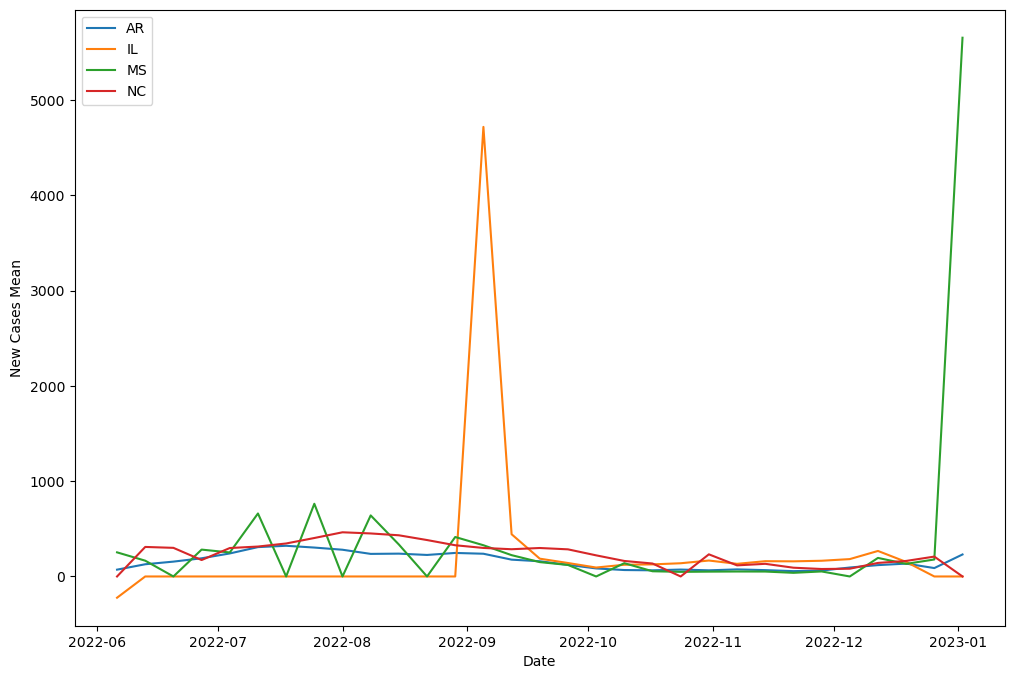

In [111]:
#plot new cases mean for each state
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the states and plot each line
for state in df_2022_grp['State'].unique():
    state_data = df_2022_grp[df_2022_grp['State'] == state]
    ax.plot(state_data['Date'], state_data['cases_norm_mean'], label=state)

ax.set_xlabel('Date')
ax.set_ylabel('New Cases Mean')
ax.legend()

plt.show()

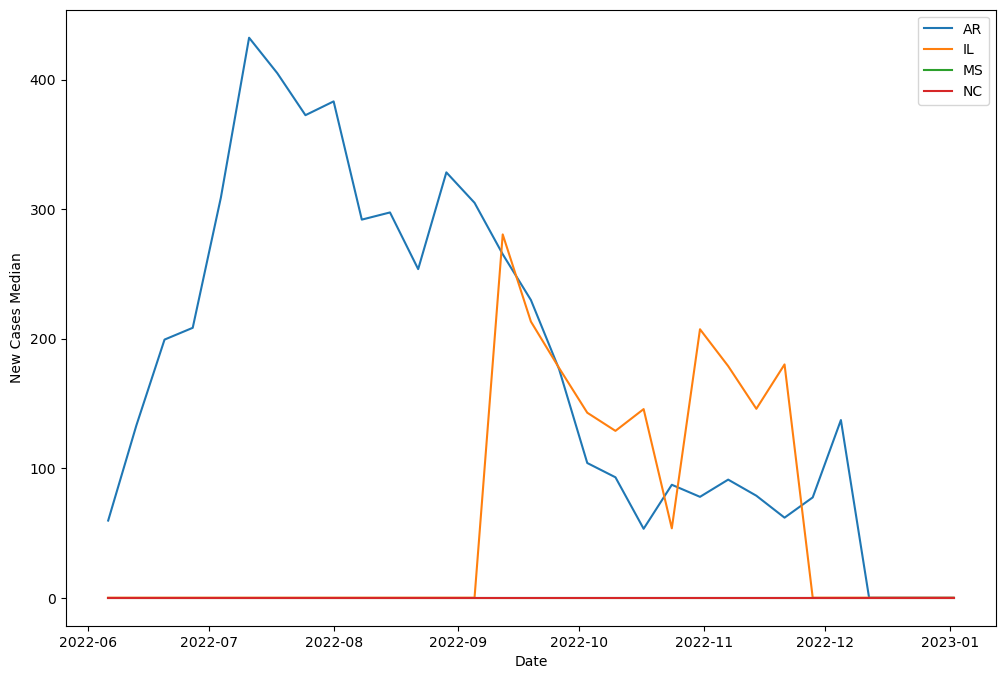

In [114]:
#plot new cases median for each state
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the states and plot each line
for state in df_2022_grp['State'].unique():
    state_data = df_2022_grp[df_2022_grp['State'] == state]
    ax.plot(state_data['Date'], state_data['cases_norm_median'], label=state)

ax.set_xlabel('Date')
ax.set_ylabel('New Cases Median')
ax.legend()

plt.show()

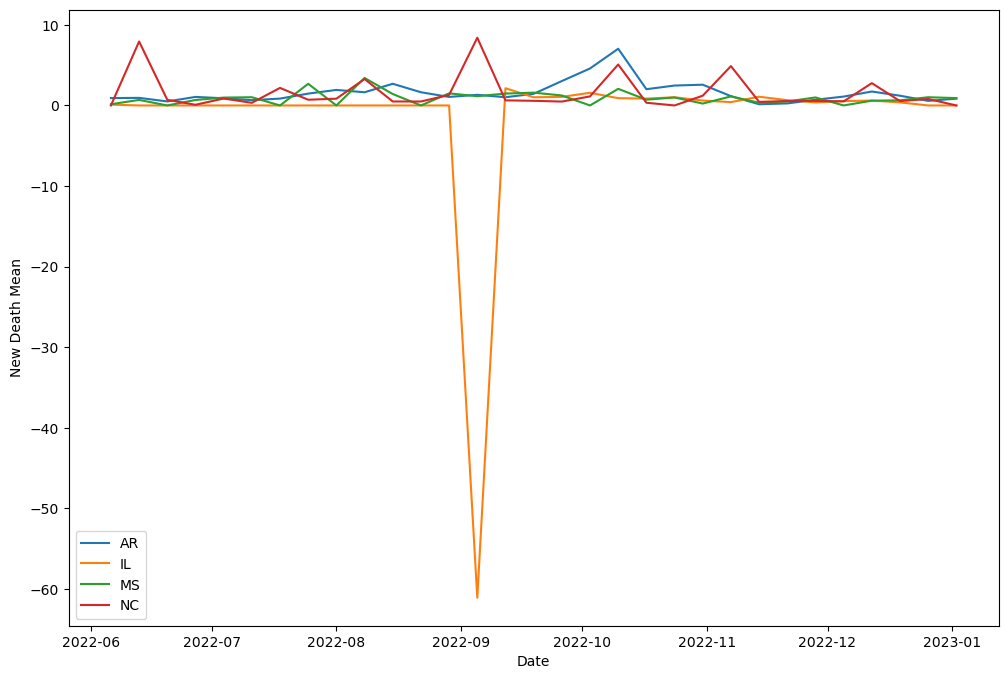

In [116]:
#plot new death mean for each state
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the states and plot each line
for state in df_2022_grp['State'].unique():
    state_data = df_2022_grp[df_2022_grp['State'] == state]
    ax.plot(state_data['Date'], state_data['deaths_norm_mean'], label=state)

ax.set_xlabel('Date')
ax.set_ylabel('New Death Mean')
ax.legend()

plt.show()

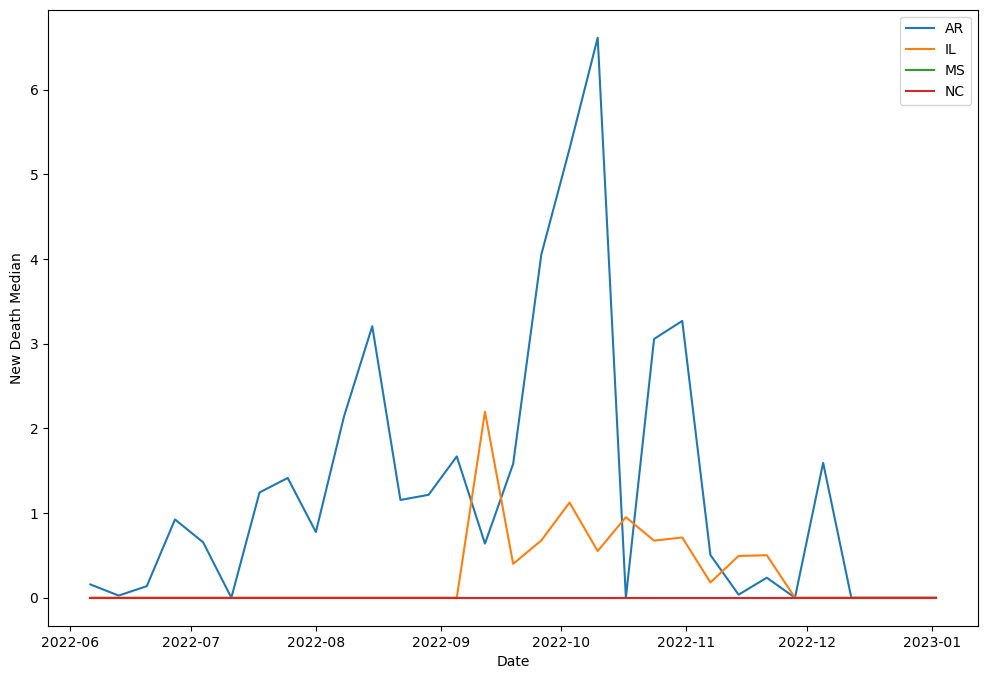

In [119]:
#plot new death mean for each state
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the states and plot each line
for state in df_2022_grp['State'].unique():
    state_data = df_2022_grp[df_2022_grp['State'] == state]
    ax.plot(state_data['Date'], state_data['deaths_norm_median'], label=state)

ax.set_xlabel('Date')
ax.set_ylabel('New Death Median')
ax.legend()

plt.show()

Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?


The COVID-19 cases and death rates differ across multiple states. Various factors including differences in population density, demographics, and adherence to public health guidelines are responsible for it. 

Comparing New Cases : 
- There is much difference in trends in all the 3 states(IL, MS, NC) as compared to AR.
- There is some consistency in new cases in AR state and does not have a major peak or fall in cases, while other states like IL and MS during September and December 2022, respectively, have seen major peaks. There could be number of factors like testing rate and vaccination rate which could have affected it.
- These peaks are not consistent with the US pattern

Comparing New Deaths: 
- We can observe there is a major downfall in IL state for number of deaths in September 2022, this seems to be report lagging or data collection issue. 
- Some similar patterns in death rate can be observed in August and mid-october where the death rate was rising
- Overall there can be seen a little consistency in death rate between state and US pattern, for eg major downfall in September month and peak around July.

# Identify 3 counties within a state of your choice with high cases and death rates.


In [153]:
data = melted_df[melted_df['State'] == 'MS']

df_grouped = data.groupby('County Name').agg({
    'cases': 'sum',
    'deaths': 'sum'
})

# sort the counties by cases and deaths separately
df_sorted_cases = df_grouped.sort_values(by=['cases'], ascending=False)
df_sorted_deaths = df_grouped.sort_values(by=['deaths'], ascending=False)

top_counties_cases = df_sorted_cases.head(3).index.tolist()
top_counties_deaths = df_sorted_deaths.head(3).index.tolist()

print(f'Top 3 counties in {state} by cases: {top_counties_cases}')
print(f'Top 3 counties in {state} by deaths: {top_counties_deaths}')

Top 3 counties in NC by cases: ['Hinds County', 'Harrison County', 'DeSoto County']
Top 3 counties in NC by deaths: ['Hinds County', 'Harrison County', 'DeSoto County']


# Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

In [154]:
# Filter data for above counties
df_counties = melted_df[(melted_df['State'] == 'MS') & (melted_df['County Name'].isin(['Hinds County', 'Harrison County', 'DeSoto County']))]

df_counties['Date'] = pd.to_datetime(df_counties['Date'])
df_counties.set_index('Date', inplace=True)

df_counties['new cases'] = df_counties['cases'].diff()
df_counties['new deaths'] = df_counties['deaths'].diff()

df_counties_mean = df_counties.groupby(['County Name', pd.Grouper(freq='W-MON')])['new cases', 'new deaths'].mean().reset_index()

df_counties_mean


Type,County Name,Date,new cases,new deaths
0,DeSoto County,2022-06-06,-2224.400000,-237.000000
1,DeSoto County,2022-06-13,-2263.714286,-238.000000
2,DeSoto County,2022-06-20,-2355.000000,-239.000000
3,DeSoto County,2022-06-27,-2379.000000,-239.000000
4,DeSoto County,2022-07-04,-2649.714286,-240.714286
...,...,...,...,...
88,Hinds County,2022-12-05,1042.000000,133.000000
89,Hinds County,2022-12-12,1164.857143,133.000000
90,Hinds County,2022-12-19,1353.000000,133.000000
91,Hinds County,2022-12-26,1467.857143,135.571429


In [155]:
df_counties_median = df_counties.groupby(['County Name', pd.Grouper(freq='W-MON')])['new cases', 'new deaths'].median().reset_index()

df_counties_median


Type,County Name,Date,new cases,new deaths
0,DeSoto County,2022-06-06,-2370.0,-237.0
1,DeSoto County,2022-06-13,-2321.0,-238.0
2,DeSoto County,2022-06-20,-2355.0,-239.0
3,DeSoto County,2022-06-27,-2477.0,-239.0
4,DeSoto County,2022-07-04,-2742.0,-241.0
...,...,...,...,...
88,Hinds County,2022-12-05,1042.0,133.0
89,Hinds County,2022-12-12,1257.0,133.0
90,Hinds County,2022-12-19,1425.0,133.0
91,Hinds County,2022-12-26,1475.0,136.0


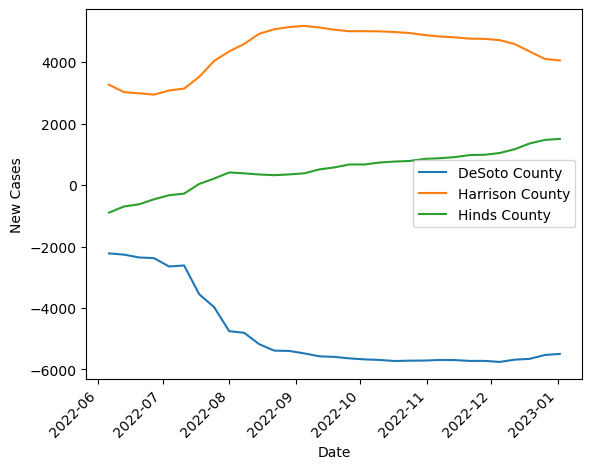

In [156]:
#plot new cases mean for each state
grouped_data = df_counties_mean.groupby('County Name')

for name, group in grouped_data:
    plt.plot(group['Date'], group['new cases'], label=name)

# Set the x-axis label and format
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')

plt.ylabel('New Cases')
plt.legend()

plt.show()

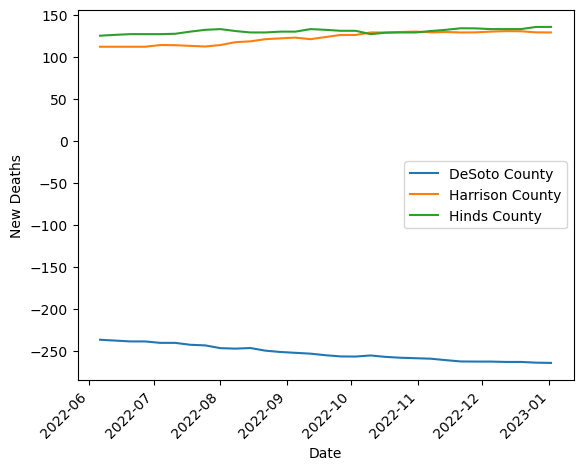

In [157]:
#plot new cases mean for each state
grouped_data = df_counties_mean.groupby('County Name')

for name, group in grouped_data:
    plt.plot(group['Date'], group['new deaths'], label=name)

# Set the x-axis label and format
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')

plt.ylabel('New Deaths')
plt.legend()

plt.show()


Comparing New Cases : 
- Counties does not seem to follow State pattern
- While there is downfall in December in Desoto county, for the state it was peak cases
- Cases for one county is increasing while other is decreasing, which could be due to effective preventive measure taken

Comparing New Deaths:
- Desoto county was constantly observing decrease in new deaths, which is not consistent with state pattern
- While there is a major downfall in death cases in September, no such observation is county 
- At county level no major peaks or down fall are observed, while state level has many peaks and falls